In [3]:
# pull a months worth of meeting data.
from cdp_data import CDPInstances, datasets

# Get a dataset of "city council sessions"
kingCounty_transcripts_aug_2022_to_sep_2022 = datasets.get_session_dataset(
    CDPInstances.KingCounty,  # specify the city (or county) council we want data from
    start_datetime="2022-08-01",  # YYYY-MM-DD format
    end_datetime="2022-09-01",  # YYYY-MM-DD format
    store_transcript=True,  # store transcripts locally for fast file reading
    store_transcript_as_csv=True,  # store transcripts as CSVs for easy pandas reading
)
kingCounty_transcripts_aug_2022_to_sep_2022

Fetching each model attached to event_ref:   0%|          | 0/5 [00:00<?, ?it/s]

Fetching transcripts:   0%|          | 0/5 [00:00<?, ?it/s]

Converting and storing each transcript as a CSV: 5it [00:03,  1.59it/s]


,session_datetime,session_index,session_content_hash,video_uri,video_start_time,video_end_time,caption_uri,external_source_id,id,key,event,transcript,transcript_path,transcript_as_csv_path
0,2022-08-17 16:00:00+00:00,0,7ea3c00e5e35d176da0a3845cc4ddc6d013c9e33deb2d9...,https://storage.googleapis.com/download/storag...,None,None,None,None,a8ff412b39cf,session/a8ff412b39cf,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...
1,2022-08-23 16:30:00+00:00,0,604c761025077a06ac6d707bc89bf61c26468d207edbc8...,https://storage.googleapis.com/download/storag...,None,None,None,None,93d03a155201,session/93d03a155201,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...
2,2022-08-23 20:00:00+00:00,0,b6d8639db4c380c521ccfce432e64996bc407c764c3e84...,https://storage.googleapis.com/download/storag...,None,None,None,None,6a52f7acc561,session/6a52f7acc561,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...
3,2022-08-24 16:30:00+00:00,0,543d159301ddd61d52bfdb7a0de4ea474af1f736dfdc71...,https://storage.googleapis.com/download/storag...,None,None,None,None,045040daa18b,session/045040daa18b,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...
4,2022-08-30 16:30:00+00:00,0,04a80bf46c5d842a06d18c40b5567b524a45c52a277e9a...,https://storage.googleapis.com/download/storag...,None,None,None,None,cc9dfc606090,session/cc9dfc606090,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...


In [68]:
## start with only a few days worth of data

few_days = kingCounty_transcripts_aug_2022_to_sep_2022[0:2]
few_days

,session_datetime,session_index,session_content_hash,video_uri,video_start_time,video_end_time,caption_uri,external_source_id,id,key,event,transcript,transcript_path,transcript_as_csv_path
0,2022-08-17 16:00:00+00:00,0,7ea3c00e5e35d176da0a3845cc4ddc6d013c9e33deb2d9...,https://storage.googleapis.com/download/storag...,None,None,None,None,a8ff412b39cf,session/a8ff412b39cf,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...
1,2022-08-23 16:30:00+00:00,0,604c761025077a06ac6d707bc89bf61c26468d207edbc8...,https://storage.googleapis.com/download/storag...,None,None,None,None,93d03a155201,session/93d03a155201,<cdp_backend.database.models.Event object at 0...,<cdp_backend.database.models.Transcript object...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...,/Users/kellyzwang/Desktop/sig-cdp/cdp-datasets...


In [171]:
# Use the three NER models with each sentences text in each meeting in your month worth of data.
import pandas as pd
import spacy

nlp_spacy = spacy.load("en_core_web_sm")


from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
nlp_transformers = pipeline("ner", model=model, tokenizer=tokenizer)

    
rows = []
for i in range(len(kingCounty_transcripts_aug_2022_to_sep_2022)):
    session = kingCounty_transcripts_aug_2022_to_sep_2022.iloc[i]
    sentences = pd.read_csv(session.transcript_as_csv_path)
    
    
    for t in range(len(sentences)):
        # spacy NER model:
        doc = nlp_spacy(sentences.text[t])
        for entity in doc.ents:
            rows.append([session.id, 'spacy', sentences.index[t], entity.label_, entity.text])
    
        # transformers NER model:
        ner_results = nlp_transformers(sentences.text[t])
        for s in range(len(ner_results)):
            rows.append([session.id, 'transformers', sentences.index[t], ner_results[s]["entity"], ner_results[s]["word"]])


metrics_df = pd.DataFrame(rows, columns=["session_id", "ner_model", "sentence_index", "named_entity_type", "entity"])
metrics_df


,session_id,ner_model,sentence_index,named_entity_type,entity
0,a8ff412b39cf,spacy,0,DATE,August 17th 2022
1,a8ff412b39cf,spacy,1,PERSON,Jean Cole Wells
2,a8ff412b39cf,spacy,1,GPE,King County
3,a8ff412b39cf,transformers,1,B-PER,Jean
4,a8ff412b39cf,transformers,1,I-PER,Cole
...,...,...,...,...,...
8904,cc9dfc606090,transformers,1396,I-ORG,Services
8905,cc9dfc606090,spacy,1398,DATE,"Tuesday, September 6"
8906,cc9dfc606090,spacy,1398,TIME,9:30
8907,cc9dfc606090,spacy,1398,DATE,one week


In [169]:
# storing metrics dataframe to a csv
metrics_df.to_csv('NER_metrics.csv') 

In [75]:
# only spacy model results
spacy_df = metrics_df[metrics_df['ner_model'] == 'spacy'] 

# only transformer model results
transformers_df = metrics_df[metrics_df['ner_model'] == 'transformers'] 

In [83]:
spacy_df

,session_id,ner_model,sentence_index,named_entity_type,entity
0,a8ff412b39cf,spacy,0,DATE,August 17th 2022
1,a8ff412b39cf,spacy,1,PERSON,Jean Cole Wells
2,a8ff412b39cf,spacy,1,GPE,King County
8,a8ff412b39cf,spacy,2,ORG,the King County Courthouse
12,a8ff412b39cf,spacy,3,NORP,Amish
...,...,...,...,...,...
8898,cc9dfc606090,spacy,1396,ORG,"Justice, Health and Human Services"
8905,cc9dfc606090,spacy,1398,DATE,"Tuesday, September 6"
8906,cc9dfc606090,spacy,1398,TIME,9:30
8907,cc9dfc606090,spacy,1398,DATE,one week


In [70]:
from flair.data import Sentence
from flair.models import SequenceTagger

# make a sentence
sentence = Sentence('I love Berlin .')

# load the NER tagger
tagger = SequenceTagger.load('ner')

# run NER over sentence
tagger.predict(sentence)

ModuleNotFoundError: No module named 'flair'

## What types of entities are recognized over all the meetings? 
I.e. How many are people? How many are organizations? etc.

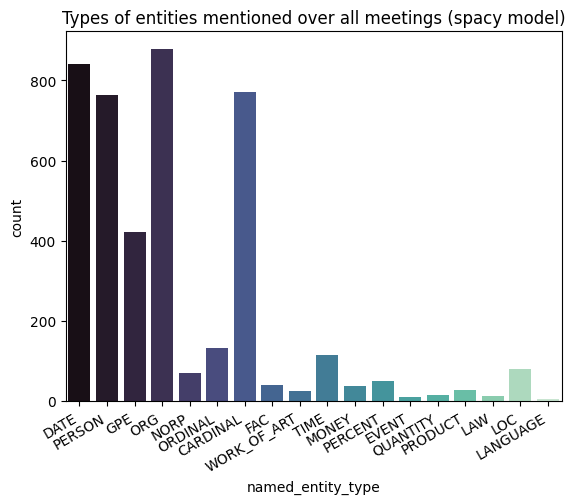

In [165]:
import seaborn as sns 

# answer with only spacy model results
ax = sns.countplot(data=spacy_df, x="named_entity_type", palette="mako")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
_ = ax.set_title("Types of entities mentioned over all meetings (spacy model)")

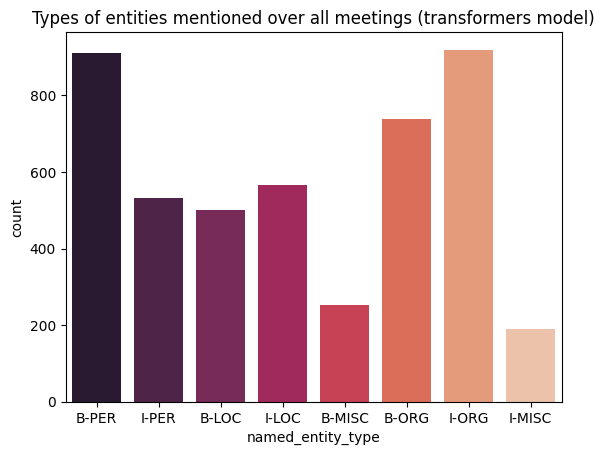

In [167]:
# answer with only transformer model results
ax = sns.countplot(data=transformers_df, x="named_entity_type", palette="rocket")
_ = ax.set_title("Types of entities mentioned over all meetings (transformers model)")

### Abbreviation and its description
- B-PER: Beginning of a person’s name right after another person’s name
- I-PER: Person's name
- B-LOC: Beginning of a location right after another location
- I-LOC: Location
- B-MISC: Beginning of a miscellaneous entity right after another miscellaneous entity
- B-ORG: Beginning of an organization right after another organization
- I-ORG: Organization
- I-MISC: Miscellaneous entity

# What meetings have more or less entities recognized overall? 
We want to see the distribution of entities mentioned over different meetings. 

I.e. Meeting abcd1234 had 204 recognized entities, meeting efgh5678 had 559 recognized entities, etc.



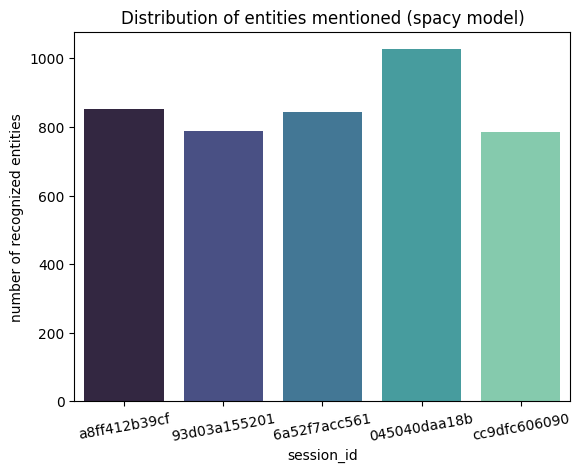

In [166]:
# answer with only spacy model results

ax = sns.countplot(data=spacy_df, x="session_id", palette="mako")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
_ = ax.set_ylabel("number of recognized entities")
_ = ax.set_title("Distribution of entities mentioned (spacy model)")

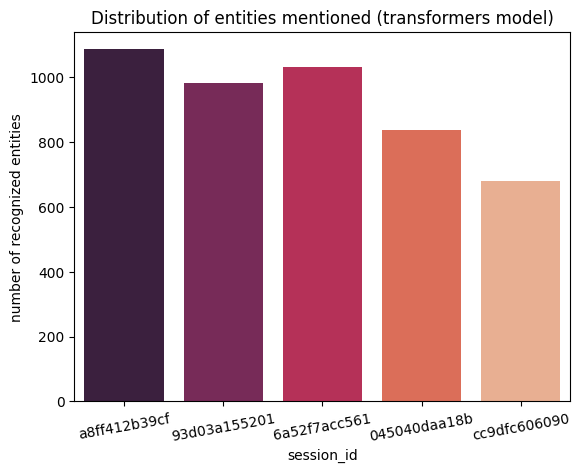

In [168]:
# answer with only transformers model results

ax = sns.countplot(data=transformers_df, x="session_id", palette="rocket")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
_ = ax.set_ylabel("number of recognized entities")
_ = ax.set_title("Distribution of entities mentioned (transformers model)")

# Make a third plot that is entirely up to you. 

Come up with a question and try to answer it via a plot.

## What are the most common recognized entities over all the meetings? 

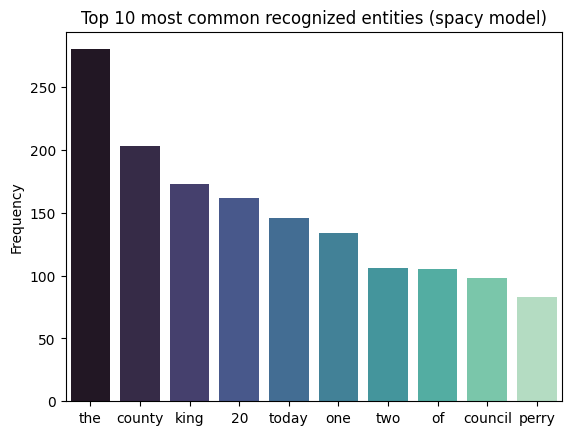

In [194]:
# answer with only spacy model results
from heapq import nlargest
import numpy as np

word_count = {}
 
for e in spacy_df["entity"]:
    words = e.split()
    for word in words:
        if word.lower() in word_count:
            word_count[word.lower()] += 1
        else:
            word_count[word.lower()] = 1

most_appeared = dict(nlargest(10, word_count.items(), key=lambda i: i[1]))

df = pd.DataFrame(list(most_appeared.items()), columns=['x', 'y'])
ax = sns.barplot(x='x', y='y', data=df, palette="mako")
_ = ax.set_ylabel("Frequency")
_ = ax.set_xlabel("")
_ = ax.set_title("Top 10 most common recognized entities (spacy model)")

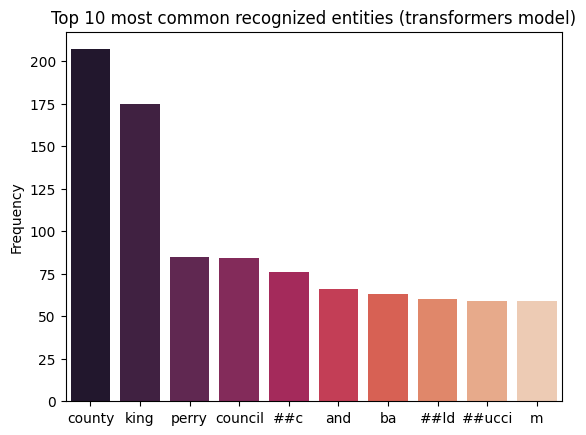

In [197]:
# answer with only transformers model results

word_count = {}
 
for e in transformers_df["entity"]:
    words = e.split()
    for word in words:
        if word.lower() in word_count:
            word_count[word.lower()] += 1
        else:
            word_count[word.lower()] = 1

most_appeared = dict(nlargest(10, word_count.items(), key=lambda i: i[1]))

df = pd.DataFrame(list(most_appeared.items()), columns=['x', 'y'])
ax = sns.barplot(x='x', y='y', data=df, palette="rocket")
_ = ax.set_ylabel("Frequency")
_ = ax.set_xlabel("")
_ = ax.set_title("Top 10 most common recognized entities (transformers model)")